# Simple Linear Regression

In this notebook, we'll build a linear regression model

In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# verify the path using getcwd()

import os 
os.getcwd()

'C:\\Users\\Admin\\All ML Projects\\Regression Practice'

# Reading and Understanding the Data

In [4]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.shape

(200, 4)

# EDA

## Missing Value Check

In [6]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Outlier Check

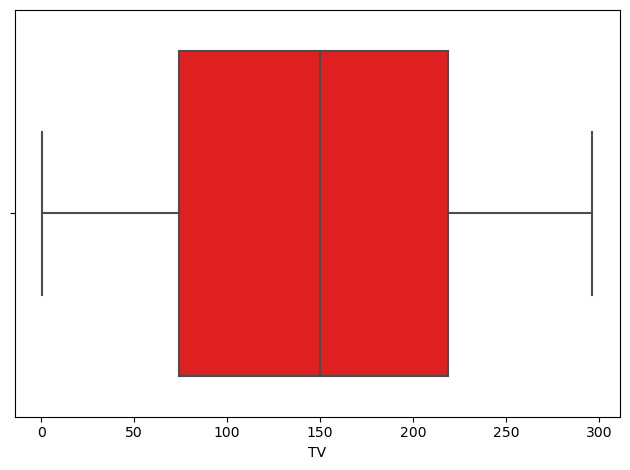

In [7]:
sns.boxplot(advertising['TV'],color = 'r') #check the estimator 'mean' here by default
plt.tight_layout()
plt.show();

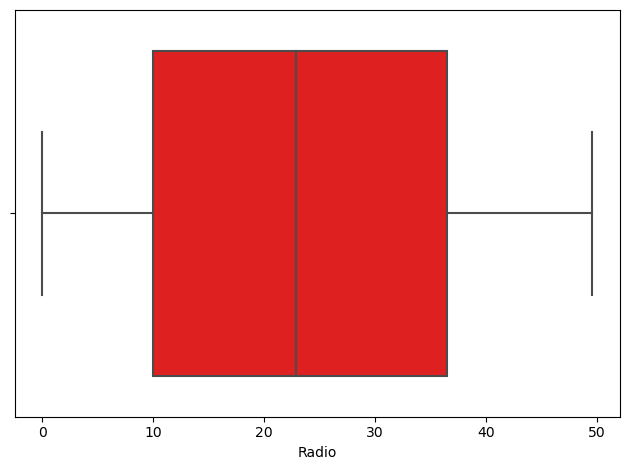

In [8]:
sns.boxplot(advertising['Radio'],color = 'r') #check the estimator 'mean' here by default
plt.tight_layout()
plt.show();

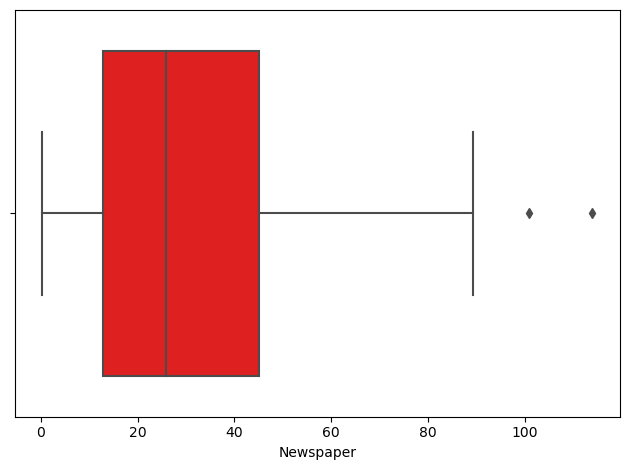

In [9]:
sns.boxplot(advertising['Newspaper'],color = 'r') #check the estimator 'mean' here by default
plt.tight_layout()
plt.show();

## Outlier Treatment

In [10]:
def treat_outlier(col):
    q1,q3 = col.quantile([0.25,0.75])
    print("First Quartlie- ", q1)
    print("Third Quartlie- ", q3)
    IQR = q3-q1
    print(IQR)
    lower_range = q1-(1.5*IQR)
    upper_range = q3 + (1.5*IQR)
    return lower_range, upper_range

In [11]:
lrincome,urincome = treat_outlier(advertising['Newspaper'])
advertising['Newspaper'] = np.where(advertising['Newspaper']>urincome,urincome,advertising['Newspaper'])
advertising['Newspaper'] = np.where(advertising['Newspaper']<lrincome,lrincome,advertising['Newspaper'])

First Quartlie-  12.75
Third Quartlie-  45.1
32.35


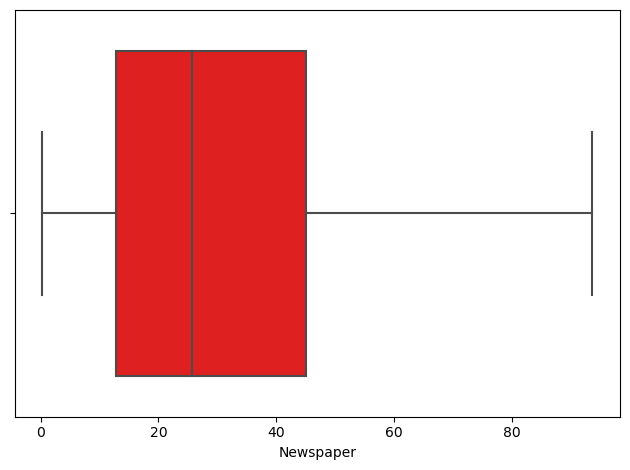

In [12]:
sns.boxplot(advertising['Newspaper'],color = 'r') #check the estimator 'mean' here by default
plt.tight_layout()
plt.show();

## Summary Statistics

In [13]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.415750,15.130500
std,85.854236,14.846809,21.316901,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,93.625000,27.000000


## Correlation Check

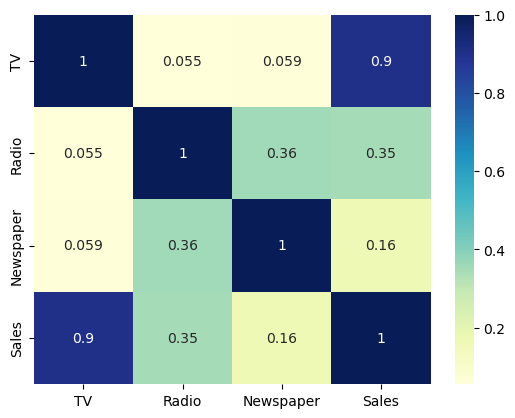

In [14]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Correlation Plots

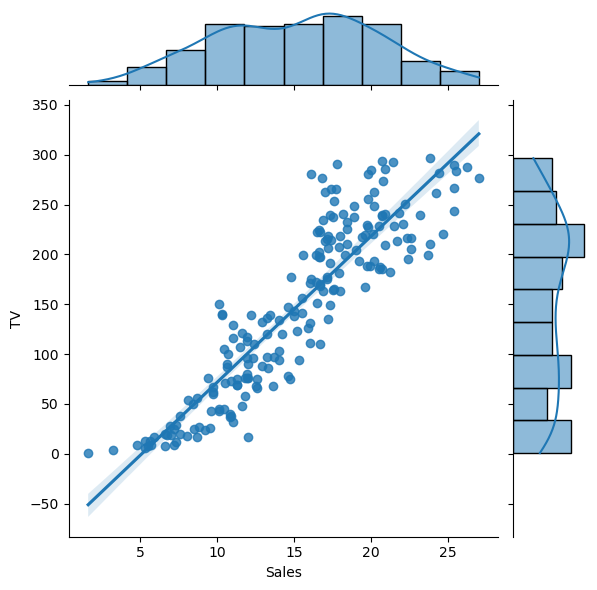

In [15]:
#What pattern do you observe? Does rating increase with price?
sns.jointplot(advertising.Sales, advertising.TV,kind = "reg")

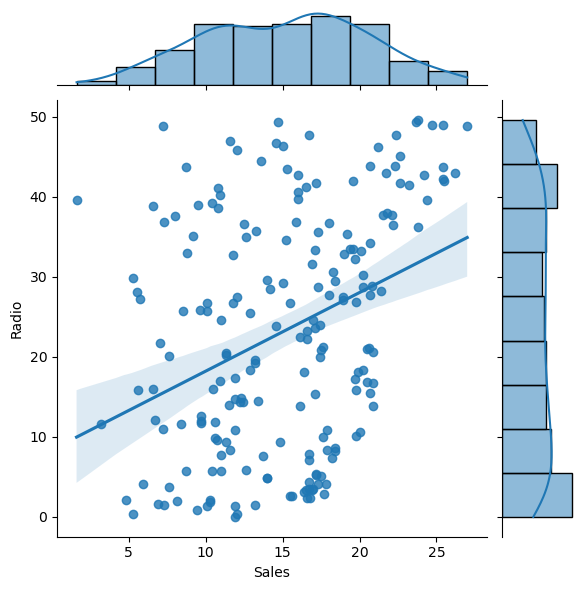

In [16]:
#What pattern do you observe? Does rating increase with price?
sns.jointplot(advertising.Sales, advertising.Radio,kind = "reg")

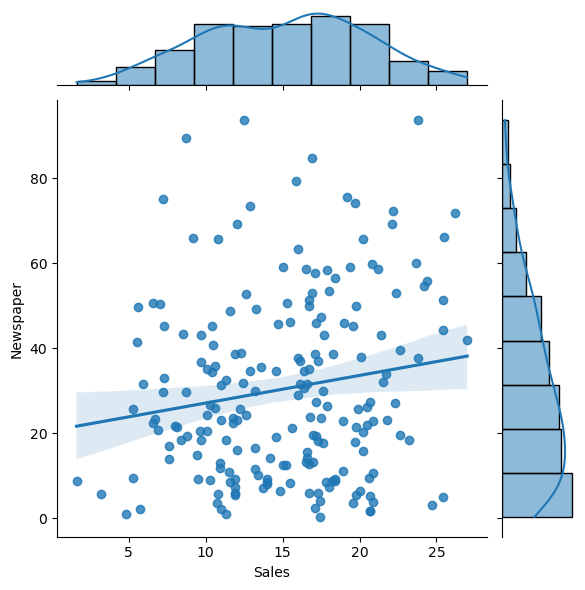

In [17]:
#What pattern do you observe? Does rating increase with price?
sns.jointplot(advertising.Sales, advertising.Newspaper,kind = "reg")

# Model Building - SM Technique 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_train, df_test = train_test_split(advertising, train_size = 0.8, random_state = 100)

In [20]:
print(df_train.shape)
print(df_test.shape)

(160, 4)
(40, 4)


In [21]:
X_train = df_train.drop("Sales", axis=1)
y_train = df_train['Sales']
print(X_train.shape)
print(y_train.shape)

(160, 3)
(160,)


In [22]:
X_test = df_test.drop("Sales", axis=1)
y_test = df_test['Sales']
print(X_test.shape)
print(y_test.shape)

(40, 3)
(40,)


In [23]:
#Importing the statsmodel library
import statsmodels.api as sm

In [24]:
X_train_constant = sm.add_constant(X_train)

In [25]:
#Applying linear regression
model1 = sm.OLS(y_train, X_train_constant)

In [26]:
model1 = model1.fit()

In [27]:
#Finding the summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     535.6
Date:                Sat, 18 May 2024   Prob (F-statistic):           6.90e-82
Time:                        21:24:43   Log-Likelihood:                -303.48
No. Observations:                 160   AIC:                             615.0
Df Residuals:                     156   BIC:                             627.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4150      0.330     13.382      0.000       3.763       5.067
TV             0.0537      0.001     37.693      0.000       0.051       0.057
Radio          0.1060      0.010     11.159      0.000       0.087       0.125
Newspaper      0.0057      0.006      0.874      0.383      -0.007       0.019
==============================================================================
Omnibus:                       19.050   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.533
Skew:                          -0.584   Prob(JB):                     5.23e-08
Kurtosis:                       4.914   Cond. No.                         446.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Building - Sklearn Technique

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()
lm

LinearRegression()

In [30]:
lm_model = lm.fit(X_train,y_train)
lm_model

LinearRegression()

In [31]:
lm_model.intercept_

4.415031624980928

In [32]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lm_model.coef_[idx]))

The coefficient for TV is 0.05373047342211257
The coefficient for Radio is 0.1060466751689843
The coefficient for Newspaper is 0.005681385761551313


# Prediction

In [33]:
y_train_predict = lm_model.predict(X_train)
y_train_predict[:5]

array([18.81852495, 15.50222993, 15.7393677 , 16.88346208, 13.01785344])

In [34]:
y_test_predict = lm_model.predict(X_test)
y_test_predict[:5]

array([ 9.2468231 , 20.8811427 , 16.36231359, 19.99992107, 21.56326886])

# Accuracy Metrics

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

In [36]:
print("R2 score",lm_model.score(X_train,y_train))
print("MAE Score",mean_absolute_error(y_train,y_train_predict))
print("MSE Score",mean_squared_error(y_train,y_train_predict))
print("MSLE Score",mean_squared_log_error(y_train,y_train_predict))

R2 score 0.9115084377793005
MAE Score 1.1942205960914962
MSE Score 2.600449515619875
MSLE Score 0.023583629117687584


In [37]:
print("R2 score",lm_model.score(X_test,y_test))
print("MAE Score",mean_absolute_error(y_test,y_test_predict))
print("MSE Score",mean_squared_error(y_test,y_test_predict))
print("MSLE Score",mean_squared_log_error(y_test,y_test_predict))

R2 score 0.8294358621517743
MAE Score 1.416372685641058
MSE Score 3.3555765095432823
MSLE Score 0.01385816094170587
